# Unsupervised Learning Project2

## Introduction

**DOMAIN**: Automobile


**CONTEXT**: The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The
vehicle may be viewed from one of many different angles.

**DATA DESCRIPTION**: The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles
was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to
distinguish between the cars.

All the features are numeric i.e. geometric features extracted from the silhouette.

Import the necessary libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

%matplotlib inline

## Load the dataset

In [2]:
vehicle_df = pd.read_csv('vehicle.csv')
vehicle_df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [3]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [4]:
vehicle_df.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
vehicle_df.shape

(846, 19)

Check percentage of missing values

In [6]:
vehicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [7]:
vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
replace_struc = {'car': 1, 'bus': 2, 'van': 3}
vehicle_df['class'] = vehicle_df['class'].map(replace_struc)

In [9]:
vehicle_df['class'].value_counts()

1    429
2    218
3    199
Name: class, dtype: int64

Impute the null values with median

In [12]:
columns = list(vehicle_df.columns)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
vehicle_df = pd.DataFrame(imputer.fit_transform(vehicle_df), columns = columns)

vehicle_df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

Visualize a Pie-chart and print percentage of values for variable ‘class’

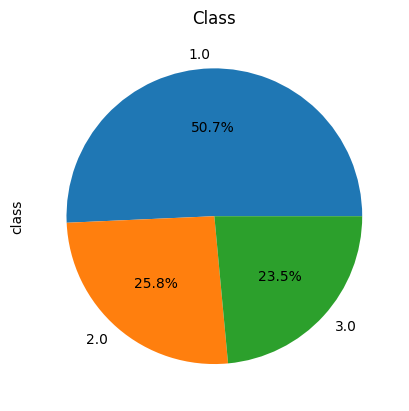

In [13]:
vehicle_df['class'].value_counts().plot.pie(autopct='%1.1f%%');
plt.title('Class')
plt.show()

In the above graph, Car is 1, Bus is 2 and Van is 3

Check for duplicate rows in the data and impute them

In [14]:
vehicle_df.duplicated().sum()

0

## Data Preparation and Analysis

Split data into Train and Test

In [15]:
X_train, X_test, y_train, y_test = train_test_split(vehicle_df.iloc[:,:-1], vehicle_df.iloc[:,-1], test_size = 0.2, random_state = 42)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(676, 18)
(170, 18)
(676,)
(170,)


In [17]:
X_train.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
665,90.0,47.0,85.0,161.0,64.0,10.0,163.0,42.0,20.0,160.0,177.0,389.0,185.0,73.0,9.0,0.0,185.0,195.0
633,102.0,52.0,101.0,213.0,64.0,10.0,203.0,33.0,23.0,157.0,214.0,616.0,186.0,65.0,0.0,19.0,193.0,203.0
570,105.0,53.0,108.0,206.0,63.0,12.0,222.0,31.0,25.0,168.0,226.0,712.0,201.0,71.0,15.0,35.0,189.0,203.0
788,115.0,52.0,100.0,203.0,62.0,10.0,217.0,31.0,24.0,165.0,229.0,697.0,214.0,72.0,14.0,4.0,188.0,197.0
539,109.0,55.0,96.0,191.0,57.0,6.0,241.0,28.0,26.0,170.0,267.0,857.0,242.0,85.0,8.0,9.0,184.0,184.0


Standardize the Data

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Model Training and Evaluation

Train a base Classification model using SVM.

In [19]:
classifier = svm.SVC()
classifier.fit(X_train , y_train)
y_pred = classifier.predict(X_test)

Print Classification metrics for train data

In [20]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.9763313609467456
0.9647058823529412


In [21]:
print("classification  Matrix:\n",classification_report(y_test,y_pred))

classification  Matrix:
               precision    recall  f1-score   support

         1.0       0.97      0.97      0.97        78
         2.0       0.98      0.96      0.97        52
         3.0       0.93      0.95      0.94        40

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170



Apply PCA on the data for all the components

In [22]:
cov_matrix = np.cov(X_train.T)
print('Covariance Matrix \n%s', cov_matrix)

e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00148148e+00  6.88199055e-01  7.85761002e-01  6.86661582e-01
   1.04119727e-01  1.27578064e-01  8.11688423e-01 -7.88963703e-01
   8.12622425e-01  6.75083367e-01  7.51395148e-01  8.13047493e-01
   5.82089557e-01 -2.82323938e-01  2.39939403e-01  1.28953227e-01
   3.22880454e-01  4.03732837e-01]
 [ 6.88199055e-01  1.00148148e+00  7.95787080e-01  6.15034865e-01
   1.55776560e-01  2.39326219e-01  8.56597562e-01 -8.26164666e-01
   8.54188410e-01  9.66034584e-01  8.03802360e-01  8.45425064e-01
   9.37222374e-01  4.32052679e-02  1.43467434e-01 -4.69284302e-02
  -1.00649641e-01  5.29945152e-02]
 [ 7.85761002e-01  7.95787080e-01  1.00148148e+00  7.58464899e-01
   1.61993249e-01  2.43156204e-01  9.09678230e-01 -9.13151101e-01
   9.00030402e-01  7.75008643e-01  8.62335600e-01  8.91906288e-01
   7.05275705e-01 -2.39170410e-01  1.09040193e-01  2.34696926e-01
   1.54755419e-01  3.45451363e-01]
 [ 6.86661582e-01  6.15034865e-01  7.58464899e-01  1.00148148e+00
   6.79331521e-

In [23]:
total = sum(e_vals)
var_expl = [( i /total ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_expl = np.cumsum(var_expl)
print("Cumulative Variance Explained", cum_var_expl)

Cumulative Variance Explained [ 52.18585958  68.72907208  79.83779007  86.58249122  91.56614911
  94.28620923  96.1517405   97.38879185  98.25704011  98.76288991
  99.13462434  99.38404079  99.58511011  99.73434605  99.83166212
  99.91598043  99.97964437 100.        ]


Visualize Cumulative Variance Explained with Number of Components

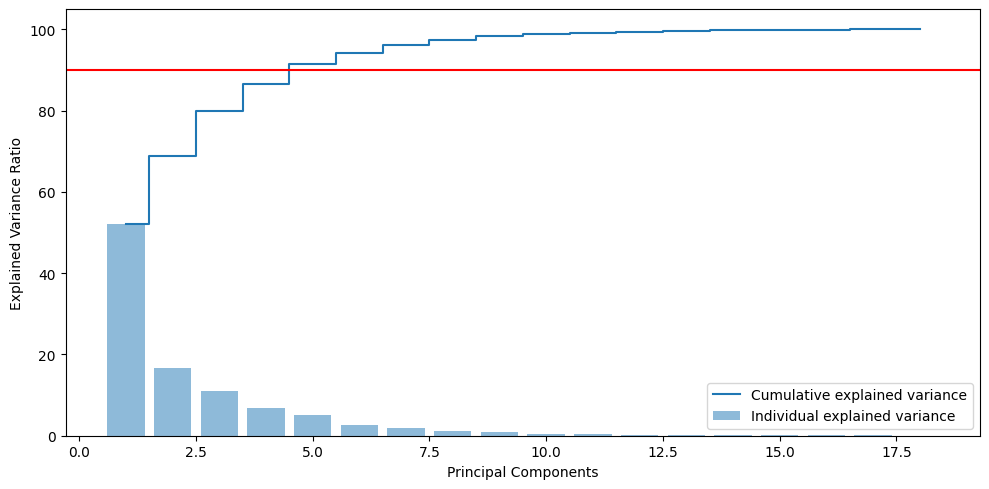

In [24]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_expl, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_expl, where='mid', label = 'Cumulative explained variance')
plt.axhline(y=90, color='r', linestyle='-')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Based on the graph above, 5 components explain slightly more than 90% of the variance

Apply PCA on the data, this time with Components with 90% or above variance explained

In [25]:
# Reducing the dimensions to 5
pca = PCA(n_components = 5, random_state = 42)
pca.fit(X_train)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.fit_transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)


(676, 5)
(170, 5)


In [26]:
pca.components_

array([[ 0.27527999,  0.28664117,  0.30323939,  0.26697046,  0.05130842,
         0.15564072,  0.31477689, -0.31117133,  0.31199399,  0.28281878,
         0.30601296,  0.31147356,  0.27090908,  0.00524133,  0.04648287,
         0.10304227,  0.00317166,  0.04321692],
       [-0.05801421,  0.06226648, -0.08787351, -0.21624496, -0.27358887,
        -0.24676007,  0.06682876, -0.01262431,  0.07733492,  0.05376685,
         0.08461536,  0.07934233,  0.18777445,  0.4940871 ,  0.06028045,
        -0.1234896 , -0.46660961, -0.5095007 ],
       [ 0.16417846, -0.09472714,  0.10516562, -0.22662135, -0.60371338,
         0.24055214, -0.00473708,  0.07352057,  0.02194084, -0.03593261,
        -0.04225498, -0.00774377, -0.103706  , -0.10631984,  0.4135523 ,
         0.51695532, -0.05884738,  0.08052388],
       [ 0.04858545,  0.19901501, -0.02877797, -0.04093879,  0.09205842,
         0.12230117, -0.09796999,  0.10054071, -0.09362189,  0.18508086,
        -0.13537541, -0.09482816,  0.19573905, -0.082

Train SVM model on components selected from above step

In [27]:
classifier_red = svm.SVC()
classifier_red.fit(X_train_reduced , y_train)
print(classifier_red.score(X_train_reduced, y_train))
print(classifier_red.score(X_test_reduced, y_test))

0.8136094674556213
0.5823529411764706


Print Classification metrics for train data of above model

<Axes: >

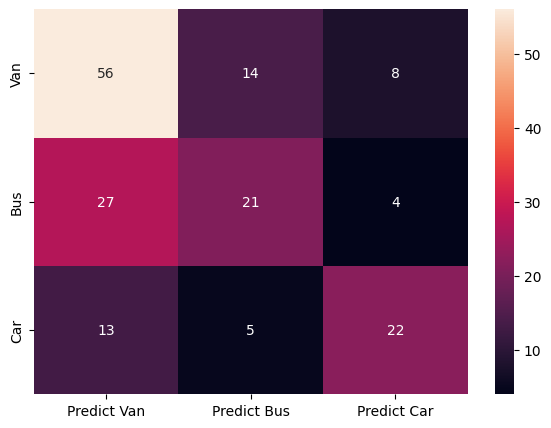

In [28]:
y_red_pred = classifier_red.predict(X_test_reduced)
cm=metrics.confusion_matrix(y_test, y_red_pred, labels=[1, 2, 3])

df_cm = pd.DataFrame(cm, index = [i for i in ["Van","Bus","Car"]],
                  columns = [i for i in ["Predict Van","Predict Bus","Predict Car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [29]:
print("classification  Matrix:\n",classification_report(y_test,y_red_pred))

classification  Matrix:
               precision    recall  f1-score   support

         1.0       0.58      0.72      0.64        78
         2.0       0.53      0.40      0.46        52
         3.0       0.65      0.55      0.59        40

    accuracy                           0.58       170
   macro avg       0.59      0.56      0.56       170
weighted avg       0.58      0.58      0.57       170



The 5 components we have chosen explain around 90% of the variance. However, our model has only 81% accuracy on the train data.

## Model Improvement

Tune hyper parameters to get the best parameters for SVM

In [30]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.548 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.563 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.570 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.728 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.644 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.652 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.515 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [31]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


Best parameters seem to be for an SVC of C = 10 and Gamma = 0.1 for RBF kernel

In [32]:
best_classifier = svm.SVC(gamma=0.1, C=10, kernel='rbf')
best_classifier.fit(X_train_reduced , y_train)
print(best_classifier.score(X_train_reduced, y_train))
print(best_classifier.score(X_test_reduced, y_test))

0.8920118343195266
0.5764705882352941


In [33]:
y_best_pred = best_classifier.predict(X_test_reduced)

<Axes: >

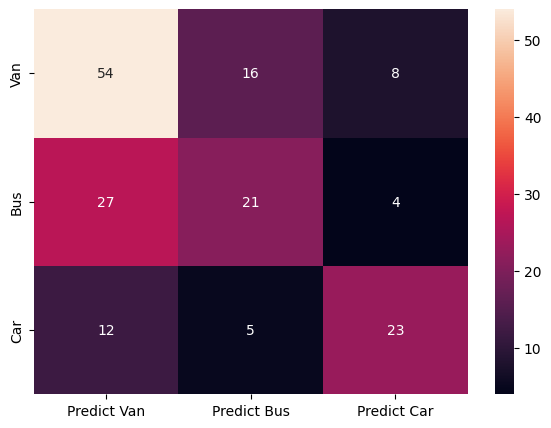

In [34]:
cm=metrics.confusion_matrix(y_test, y_best_pred, labels=[1, 2, 3])

df_cm = pd.DataFrame(cm, index = [i for i in ["Van","Bus","Car"]],
                  columns = [i for i in ["Predict Van","Predict Bus","Predict Car"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')

In [35]:
print("classification  Matrix:\n",classification_report(y_test,y_best_pred))

classification  Matrix:
               precision    recall  f1-score   support

         1.0       0.58      0.69      0.63        78
         2.0       0.50      0.40      0.45        52
         3.0       0.66      0.57      0.61        40

    accuracy                           0.58       170
   macro avg       0.58      0.56      0.56       170
weighted avg       0.57      0.58      0.57       170



Accuracy on the training data has increased to 89% which is close to the explained variance of 90% of the 5 components we have chosen.